# Capítulo 3.  Conceptos clave sobre Inteligencia Artificial

## Preprocesamiento

In [177]:
import pandas as pd
# Leer archivo CSV
df = pd.read_csv("../datasets/credit_risk_dataset.csv")
df.shape

(32581, 12)

In [178]:
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [179]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

### Manejo de faltantes

In [180]:
#Conocer las columnas con NaN
df.isnull().any()

person_age                    False
person_income                 False
person_home_ownership         False
person_emp_length              True
loan_intent                   False
loan_grade                    False
loan_amnt                     False
loan_int_rate                  True
loan_status                   False
loan_percent_income           False
cb_person_default_on_file     False
cb_person_cred_hist_length    False
dtype: bool

In [181]:
# Conocer el número de faltantes en cada columna
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [182]:
#Conocer las columnas con faltantes
nan_cols = df.columns[df.isnull().any()]
nan_cols

Index(['person_emp_length', 'loan_int_rate'], dtype='object')

In [183]:
#Obtener las filas con valores faltantes
filas_nan = df[df.isna().any(axis=1)]

In [184]:
# obtener los índices de las filas con NaN
filas_nan.index

Index([   39,    50,    57,    59,    62,    70,    71,    84,    85,    87,
       ...
       32505, 32510, 32532, 32535, 32546, 32547, 32552, 32553, 32569, 32570],
      dtype='int64', length=3943)

In [185]:
df.iloc[39, :]

person_age                                   23
person_income                             71500
person_home_ownership                      RENT
person_emp_length                           3.0
loan_intent                   DEBTCONSOLIDATION
loan_grade                                    D
loan_amnt                                 30000
loan_int_rate                               NaN
loan_status                                   1
loan_percent_income                        0.42
cb_person_default_on_file                     N
cb_person_cred_hist_length                    4
Name: 39, dtype: object

In [186]:
len(filas_nan.index)

3943

In [187]:
# eliminar filas donde aparec al menos un NaN
df.dropna(how="any", inplace=True)
df.shape

(28638, 12)

In [188]:
# eliminar las filas si en la columna person_emp_length hay faltantes
df.dropna(subset=['person_emp_length', 'loan_int_rate'], inplace = True)

In [189]:
df.shape

(28638, 12)

In [190]:
import numpy as np
df['person_emp_length'] = df['person_emp_length'].replace(np.nan, np.mean(df['person_emp_length'])) 

In [191]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [192]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')
df['loan_int_rate'] = imp.fit_transform(df[['loan_int_rate']])

### Manejo de variables categóricas

In [193]:
df['cb_person_default_on_file'].unique()

array(['Y', 'N'], dtype=object)

In [194]:
df['cb_person_default_on_file']=df['cb_person_default_on_file'].map({'Y':1, 'N':0})
df['cb_person_default_on_file']

0        1
1        0
2        0
3        0
4        1
        ..
32576    0
32577    0
32578    0
32579    0
32580    0
Name: cb_person_default_on_file, Length: 28638, dtype: int64

In [195]:
df["loan_intent"] = df["loan_intent"].astype("category")
df["loan_intent"] = df["loan_intent"].cat.codes
df["loan_intent"]

0        4
1        1
2        3
3        3
4        3
        ..
32576    4
32577    4
32578    2
32579    4
32580    3
Name: loan_intent, Length: 28638, dtype: int8

In [196]:
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,4,D,35000,16.02,1,0.59,1,3
1,21,9600,OWN,5.0,1,B,1000,11.14,0,0.10,0,2
2,25,9600,MORTGAGE,1.0,3,C,5500,12.87,1,0.57,0,3
3,23,65500,RENT,4.0,3,C,35000,15.23,1,0.53,0,2
4,24,54400,RENT,8.0,3,C,35000,14.27,1,0.55,1,4


In [197]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
df[["loan_grade"]] = enc.fit_transform(df[["loan_grade"]])
df[["person_home_ownership"]] = enc.fit_transform(df[["person_home_ownership"]])

In [198]:
df.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3.0,123.0,4,3.0,35000,16.02,1,0.59,1,3
1,21,9600,2.0,5.0,1,1.0,1000,11.14,0,0.10,0,2
2,25,9600,0.0,1.0,3,2.0,5500,12.87,1,0.57,0,3


In [199]:
# Ejemplo con LabelEncoder
import numpy as np
import pandas as pd

data = {'asistencia_clases': ['baja', 'media', 'alta', 'media', 'alta' ],
         'horas_estudio': [3,  8, 10, 4, 6],
        'Aprobado': ["Clase 1", "Clase 2", "Clase 2", "Clase 1", 'Clase 2']}

df_prueba = pd.DataFrame(data, columns = ['asistencia_clases', 'horas_estudio', 'Aprobado'])
df_prueba

,asistencia_clases,horas_estudio,Aprobado
0,baja,3,Clase 1
1,media,8,Clase 2
2,alta,10,Clase 2
3,media,4,Clase 1
4,alta,6,Clase 2


In [200]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df_prueba["Aprobado"] = enc.fit_transform(df_prueba["Aprobado"])

In [201]:
df_prueba

,asistencia_clases,horas_estudio,Aprobado
0,baja,3,0
1,media,8,1
2,alta,10,1
3,media,4,0
4,alta,6,1


In [202]:
# OnehotEncoding
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_prueba[['asistencia_clases']]).toarray(), columns=enc.categories_[0])
df2 = df.join(enc_df)
df2

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,alta,baja,media
0,22,59000,3.0,123.0,4,3.0,35000,16.02,1,0.59,1,3,0.0,1.0,0.0
1,21,9600,2.0,5.0,1,1.0,1000,11.14,0,0.10,0,2,0.0,0.0,1.0
2,25,9600,0.0,1.0,3,2.0,5500,12.87,1,0.57,0,3,1.0,0.0,0.0
3,23,65500,3.0,4.0,3,2.0,35000,15.23,1,0.53,0,2,0.0,0.0,1.0
4,24,54400,3.0,8.0,3,2.0,35000,14.27,1,0.55,1,4,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0.0,1.0,4,2.0,5800,13.16,0,0.11,0,30,NaN,NaN,NaN
32577,54,120000,0.0,4.0,4,0.0,17625,7.49,0,0.15,0,19,NaN,NaN,NaN
32578,65,76000,3.0,3.0,2,1.0,35000,10.99,1,0.46,0,28,NaN,NaN,NaN
32579,56,150000,0.0,5.0,4,1.0,15000,11.48,0,0.10,0,26,NaN,NaN,NaN


In [203]:
df_prueba = pd.get_dummies(df_prueba, prefix="asistencia", columns=['asistencia_clases'])
df_prueba

,horas_estudio,Aprobado,asistencia_alta,asistencia_baja,asistencia_media
0,3,0,False,True,False
1,8,1,False,False,True
2,10,1,True,False,False
3,4,0,False,False,True
4,6,1,True,False,False


### Escalamiento de caracteristicas

In [204]:
# Normalización
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
horas_esc = min_max_scaler.fit_transform(df_prueba[["horas_estudio"]])
horas_esc

array([[0.        ],
       [0.71428571],
       [1.        ],
       [0.14285714],
       [0.42857143]])

In [205]:
# Estandarización
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
horas_esc = std_scaler.fit_transform(df_prueba[["horas_estudio"]])
horas_esc

array([[-1.2493901 ],
       [ 0.70278193],
       [ 1.48365074],
       [-0.85895569],
       [-0.07808688]])

In [206]:
std_scaler.inverse_transform(horas_esc)

array([[ 3.],
       [ 8.],
       [10.],
       [ 4.],
       [ 6.]])

### Separación de datos en conjuntos de entrenamiento y prueba

In [207]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=df.columns[8])
y = df.iloc[:, 8] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21478, 11), (7160, 11), (21478,), (7160,))

### Reducción de la dimensionalidad con PCA

In [208]:
#1 Estandarizar
est_esc = StandardScaler()
est_esc.fit(X_train)
X_ent_est = est_esc.transform(X_train)
X_pru_est = est_esc.transform(X_test)
print(X_ent_est[0])

[-0.89784961 -0.41904959  0.92425684  0.29025297 -0.30583996  0.66617171
 -0.57787975  0.67990133 -0.18070767  2.15790894 -0.93742781]


In [209]:
# aplicamos el algoritmo PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_ent_pca = pca.fit_transform(X_ent_est)

In [210]:
pca.components_

array([[ 0.0120743 , -0.02628397,  0.13687672, -0.06301919, -0.00525065,
         0.59407664,  0.19617766,  0.58804613,  0.21166019,  0.44058199,
         0.01748262],
       [ 0.62499397,  0.30356451, -0.17779221,  0.29065814,  0.05092389,
         0.01238392,  0.15467649,  0.00767728, -0.06205703,  0.00824046,
         0.60867854],
       [-0.10744376,  0.05293964, -0.13204219,  0.11788976, -0.00185332,
        -0.12975933,  0.68496189, -0.13087272,  0.63380366, -0.1913731 ,
        -0.11334892],
       [-0.28400154,  0.48181918, -0.55272557,  0.33236323, -0.05993727,
         0.10485828,  0.08995825,  0.08971877, -0.34162251,  0.13095303,
        -0.32655507],
       [-0.05536556, -0.03338238, -0.00622946,  0.10020974,  0.99089966,
         0.01152505, -0.01682303,  0.01150442, -0.00769752,  0.0101235 ,
        -0.05610182]])

In [211]:
pca_df = pd.DataFrame(pca.components_.T,  columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
pca_df

,PC1,PC2,PC3,PC4,PC5
0,0.012074,0.624994,-0.107444,-0.284002,-0.055366
1,-0.026284,0.303565,0.052940,0.481819,-0.033382
2,0.136877,-0.177792,-0.132042,-0.552726,-0.006229
3,-0.063019,0.290658,0.117890,0.332363,0.100210
4,-0.005251,0.050924,-0.001853,-0.059937,0.990900
5,0.594077,0.012384,-0.129759,0.104858,0.011525
6,0.196178,0.154676,0.684962,0.089958,-0.016823
7,0.588046,0.007677,-0.130873,0.089719,0.011504
8,0.211660,-0.062057,0.633804,-0.341623,-0.007698
9,0.440582,0.008240,-0.191373,0.130953,0.010123


In [212]:
#El primer componente representa el 22 % de la varianza por sí solo, seguido de un 18 % adicional para el segundo componente
pca.explained_variance_ratio_

array([0.22258795, 0.18488605, 0.13768663, 0.12072885, 0.09070328])

<BarContainer object of 5 artists>

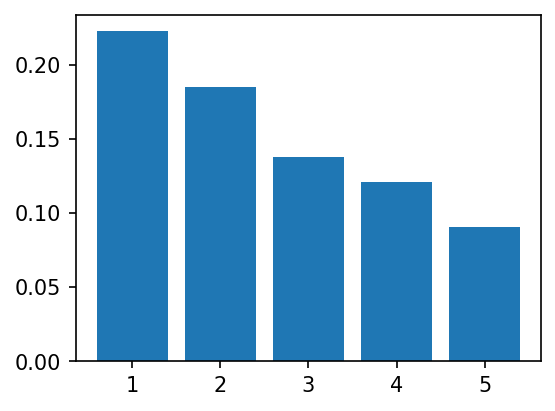

In [221]:
plt.rcParams['figure.dpi'] = 150  # Ajusta según la calidad que necesites
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [214]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.22258795, 0.407474  , 0.54516063, 0.66588947, 0.75659275])

In [215]:
X_pru_pca = pca.transform(X_pru_est)
X_pru_pca.shape

(7160, 5)

In [216]:
X_ent_pca.shape

(21478, 5)

In [217]:
X_pru_pca[0]

array([-0.94597363, -0.98901759, -1.15150236,  0.9231869 ,  0.40826917])